1.	Problem Statement:
- Understanding the impact of discounts and payment methods on the overall sales and customer retention in the Pakistan E-commerce market.
- Identifying the most profitable categories and products to optimize inventory and marketing strategies.
2.	Objectives:
- Analyze the sales trends over time, focusing on the impact of discounts and payment methods on customer purchasing behavior.
- Determine the top-performing product categories and their contribution to overall revenue.
- Investigate the relationship between order status and customer loyalty.
3.	Key Questions:
- How do discounts influence the sales volume and revenue across different product categories?
- Which payment methods are most preferred by customers, and how do they impact the rate of order completion?
- What are the key factors contributing to order cancellations and refunds?
- Which product categories generate the highest revenue and are most frequently purchased by customers?
4.	Scope:
- Timeframe: Analysis will focus on the available data period (year and month-specific trends).
- Metrics: Sales volume, revenue, discounts, payment methods, and order status.
- Segmentation: Analysis by product category, payment method, and customer behavior (loyalty).
5.	Success Criteria:
- Clear identification of the impact of discounts and payment methods on sales and customer retention.
- Insights into the most profitable product categories.
- Recommendations for optimizing inventory and marketing strategies based on customer behavior and product performance.

| **No** | **Column Name** | **Column Description**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| 1    | item_id          | Unique identifier for each item.                     |
| 2    | status        | Status of the order (e.g., complete, canceled, refunded).                         |
| 3    | created_at      | Date when the order was created.                           |
| 4    | sku        | Stock keeping unit, a unique identifier for each product.      |
| 5    | price    | Price of the item.                  |
| 6    | qty_ordered         | The country where the order was placed.                       |
| 7    | grand_total           | Total amount for the order.                          |
| 8    | increment_id          | Another identifier for the order.                        |
| 9    | category_name_1       | Category of the product (e.g., Women’s Fashion, Beauty & Grooming)..                     |
| 10   | sales_commission_code        | Code for sales commission.                |
| 11   | discount_amount     | Discount applied to the order.                        |
| 12   | payment_method        | TPayment method used (e.g., cod).                         |
| 13   | Working Date         | The date the order was processed.      |
| 14   | BI Status         | Business Intelligence status (e.g., Gross, Net).                                 |
| 15   | MV         | A metric related to the order (possibly revenue or margin value).                             |
| 16   | Year           | Year of the order.                   |
| 17   | Month        | Month of the order.                 |
| 18   | Customer Since        | Date since the customer has been associated with the platform.                     |
| 19   | M-Y        | Month-Year of the order.                             |
| 20   | FY        | Fiscal Year.                     |
| 21   | Customer ID       | Unique identifier for the customer.                           |

In [36]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import mplcursors
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from scipy.stats import shapiro, kstest, normaltest, chi2_contingency, mannwhitneyu, ttest_ind, anderson, kruskal
import unicodedata
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 500)

- Import Data

In [2]:
data = pd.read_csv("Pakistan Ecommerce Dataset.csv")
data.sample(10)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
560760,878361,received,6/29/2018,ENTSAM5A5466EA71960,89895.0,1,100265.0,100546379,Entertainment,\N,...,bankalfalah,6/29/2018,Valid,"89,895",2018,6,2018-5,18-Jun,FY18,109038
159283,412513,complete,3/1/2017,emart_00-7,630.0,1,1280.0,100274274,Home & Living,\N,...,cod,3/1/2017,Net,630,2017,3,2016-12,17-Mar,FY17,28773
385622,678353,received,11/24/2017,MEFMAR5A005365E87F9-XL,899.0,1,2895.0,100415984,Men's Fashion,\N,...,cod,11/24/2017,Valid,899,2017,11,2017-11,17-Nov,FY18,77538
199400,460998,canceled,4/29/2017,SMSM_300760,85.0,1,12105.0,100299466,Superstore,\N,...,jazzwallet,4/29/2017,Gross,85,2017,4,2016-9,17-Apr,FY17,6362
380693,673015,complete,11/23/2017,MATSAM59DB75ADB2F80,13698.0,1,10140.3,100412051,Mobiles & Tablets,\N,...,Easypay,11/23/2017,Net,"13,698",2017,11,2017-10,17-Nov,FY18,62618
435911,736383,complete,1/27/2018,HASQAR5A618CB6CD7DC,80.0,1,1109.0,100448623,Health & Sports,\N,...,cod,1/27/2018,Net,80,2018,1,2016-7,18-Jan,FY18,777
416937,714961,order_refunded,12/13/2017,WOFWIN59FFFFF68BC14,749.0,1,1198.0,100436639,Women's Fashion,\N,...,cod,12/13/2017,Valid,749,2017,12,2017-12,17-Dec,FY18,83198
12743,226980,complete,8/8/2016,Rajesh_RAJ001,1320.0,1,1320.0,100158185,Home & Living,\N,...,cod,8/8/2016,Net,"1,320",2016,8,2016-8,16-Aug,FY17,3274
501860,813584,canceled,3/28/2018,OTHPCB5ABB207785584,2000.0,2,4000.0,100504889,Others,\N,...,Easypay_MA,3/28/2018,Gross,"4,000",2018,3,2018-3,18-Mar,FY18,102123
71534,300459,order_refunded,11/22/2016,Bold_Noir,240.0,1,1023.0,100207273,Beauty & Grooming,\N,...,jazzwallet,11/22/2016,Valid,240,2016,11,2016-9,16-Nov,FY17,8546


- Check information of the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  int64  
 1   status                 584524 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584524 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  int64  
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  int64  
 8   category_name_1        584524 non-null  object 
 9   sales_commission_code  584524 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-nu

In [4]:
data.describe()

,item_id,price,qty_ordered,grand_total,increment_id,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,5.845240e+05,584524.000000,584524.000000,584524.000000,584524.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,1.003570e+08,499.492775,2017.044115,7.167654,45791.264422
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1.152815e+05,1506.943046,0.707355,3.486305,34415.075674
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,1.000013e+08,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,1.002646e+08,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,1.003512e+08,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,1.004502e+08,160.500000,2018.000000,11.000000,73538.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,1.005624e+08,90300.000000,2018.000000,12.000000,115326.000000


- Check Any Duplications Existed

In [5]:
data.duplicated().sum()

0

In [6]:
data[data.duplicated(keep=False)]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID


- Check Missing Value

In [7]:
print('Missing values status:', data.isnull().values.any())
missing_values = pd.DataFrame(data.isnull().sum(), columns=['Total Null Values'])
missing_values['Percentage'] = (missing_values['Total Null Values'] / data.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False).reset_index()

Missing values status: False


,index,Total Null Values,Percentage
0,item_id,0,0.0
1,payment_method,0,0.0
2,FY,0,0.0
3,M-Y,0,0.0
4,Customer Since,0,0.0
5,Month,0,0.0
6,Year,0,0.0
7,MV,0,0.0
8,BI Status,0,0.0
9,Working Date,0,0.0


- Check Unique Count And Values

In [8]:
# Check unique count and values of each column
def unique_data(data):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = data.columns
    data_unique['Unique Count'] = [data[col].nunique() for col in data.columns]
    data_unique['Unique'] = [data[col].unique() for col in data.columns]
    return data_unique

unique_data(data)

,Columns,Unique Count,Unique
0,item_id,584524,"[211131, 211133, 211134, 211135, 211136, 211137, 211138, 211139, 211140, 211141, 211142, 211143, 211144, 211145, 211146, 211147, 211149, 211150, 211151, 211152, 211153, 211154, 211155, 211156, 211157, 211158, 211160, 211162, 211163, 211164, 211166, 211168, 211169, 211170, 211171, 211172, 211173, 211174, 211175, 211176, 211177, 211179, 211180, 211182, 211184, 211185, 211186, 211187, 211188, 211189, 211190, 211191, 211192, 211193, 211194, 211196, 211197, 211198, 211199, 211200, 211202, 211201, 211203, 211204, 211205, 211206, 211207, 211208, 211209, 211211, 211212, 211213, 211214, 211215, 211217, 211218, 211219, 211220, 211221, 211222, 211223, 211225, 211224, 211226, 211227, 211228, 211229, 211230, 211231, 211232, 211233, 211234, 211235, 211236, 211237, 211238, 211239, 211240, 211241, 211242, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, Fcafe_11777-L, LC_359547105042, LC_3349668508587, RS_pheni Desi Ghee 1 kg , UK_Gulab Jamun Tin Pack 500 Gms, UK_Chum Chum Tin Pack 500 Gms, UK_Namkino Mix Nimco 200 Gms, sentiments_Ferrero Rocher Gift Box, EGO_E02377-SML

- Set New Index

In [9]:

# Set 'Row ID' as index
data.set_index('item_id', inplace=True)

In [10]:
data.sample(10)

,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
item_id,,,,,,,,,,,,,,,,,,,,
687673,canceled,11/24/2017,WOFDIN59D36EAEAE49C,742.5,1,2004.75,100421200,Women's Fashion,\N,74.25,easypay_voucher,11/24/2017,Gross,743,2017,11,2017-11,17-Nov,FY18,66756
721885,complete,12/26/2017,HALLEA5A02A74553F0B,1109.0,1,1109.00,100440390,Home & Living,\N,0.00,cod,12/26/2017,Net,"1,109",2017,12,2017-12,17-Dec,FY18,84084
612266,canceled,11/11/2017,HALEMA59BA906A772DD,300.0,1,1797.00,100378425,Home & Living,\N,0.00,Easypay_MA,11/11/2017,Gross,300,2017,11,2017-11,17-Nov,FY18,66394
350217,received,11/27/2016,unilever_Deal-11,200.0,1,290.00,100238157,Superstore,\N,0.00,cod,11/27/2016,Valid,200,2016,11,2016-9,16-Nov,FY17,10151
482606,canceled,5/19/2017,Adolphs_AD-15,499.0,1,1248.00,100310965,Men's Fashion,\N,0.00,Payaxis,5/19/2017,Gross,499,2017,5,2017-5,17-May,FY17,46569
593027,complete,10/10/2017,MATSAM59DB75A984259,13999.0,1,9999.00,100365904,Mobiles & Tablets,\N,4000.00,Payaxis,10/10/2017,Net,"13,999",2017,10,2017-10,17-Oct,FY18,62173
605388,canceled,10/31/2017,ENTSAM59CB906CE7B58,34940.0,1,34940.00,100374072,Entertainment,\N,0.00,Easypay,10/31/2017,Gross,"34,940",2017,10,2017-10,17-Oct,FY18,65037
519587,received,6/18/2017,PBG_D-1040,1499.0,1,2149.00,100328562,Home & Living,\N,0.00,cod,6/18/2017,Valid,"1,499",2017,6,2017-6,17-Jun,FY17,50981
270832,complete,10/29/2016,cr_DATES WITH CASHEW-200 GM,230.0,1,1275.00,100188135,Soghaat,\N,0.00,cod,10/29/2016,Net,230,2016,10,2016-10,16-Oct,FY17,11746


1. Column 'item_id' has number of unique values as much as the number of rows, therefore it is possible to make the column as the new index

- Drop Columns

In [11]:
# Drop some columns that are less relevant for next steps
columns_to_drop = ['increment_id', 'sales_commission_code', 'BI Status', 'M-Y', 'FY']
data = data.drop(columns=columns_to_drop)
data.sample(10)

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,Working Date,MV,Year,Month,Customer Since,Customer ID
item_id,,,,,,,,,,,,,,,
392892,complete,1/24/2017,RAJESH_RAJ0292,585.0,2,1170.0,Health & Sports,0.0,cod,1/24/2017,"1,170",2017,1,2017-1,31881
752537,complete,2/18/2018,WOFSIT59ACDA649CC1C,1215.0,1,356.0,Women's Fashion,7000.0,cod,2/18/2018,"1,215",2018,2,2018-2,89471
291881,complete,11/20/2016,FHM_Whiffers,1600.0,1,1280.0,Home & Living,320.0,jazzwallet,11/20/2016,"1,600",2016,11,2016-9,8201
245664,order_refunded,9/27/2016,sockoye_CG Crew Grey,299.0,1,299.0,Health & Sports,0.0,cod,9/27/2016,299,2016,9,2016-8,2454
302563,complete,11/22/2016,ANKER_A8133011-Grey,550.0,1,1419.6,Mobiles & Tablets,110.0,jazzwallet,11/22/2016,550,2016,11,2016-11,17541
754892,complete,2/19/2018,MATHUA5A7D77457B338,28944.0,1,26049.6,Mobiles & Tablets,2894.4,jazzvoucher,2/19/2018,"28,944",2018,2,2018-2,89801
881748,canceled,7/6/2018,HALWES5A9E289F9D3F5,1999.0,2,4248.0,Home & Living,0.0,bankalfalah,7/6/2018,"3,998",2018,7,2017-11,65517
753286,complete,2/19/2018,MEFKAR5A7C13DFE4BE2-XL,780.0,1,1190.0,Men's Fashion,0.0,cod,2/19/2018,780,2018,2,2018-2,89595
411236,complete,2/27/2017,memsaab_flb-404-B-Black-34,250.0,2,0.0,Women's Fashion,0.0,customercredit,2/27/2017,500,2017,2,2016-7,1570


In [12]:
# Drop some columns that are less relevant for next steps
columns_to_drop = ['Working Date']
data = data.drop(columns=columns_to_drop)
data.sample(10)

,status,created_at,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,payment_method,MV,Year,Month,Customer Since,Customer ID
item_id,,,,,,,,,,,,,,
372944,complete,12/20/2016,RS_Kaju Barfi,470.0,1,1275.00,Soghaat,0.00,cod,470,2016,12,2016-11,13481
273847,canceled,11/4/2016,Sapphire_US0421,2950.0,9,26050.00,Women's Fashion,500.00,cod,"26,550",2016,11,2016-11,13169
260195,canceled,10/7/2016,Bata_3617406-PU-Green -9,200.0,1,200.00,Kids & Baby,0.00,cod,200,2016,10,2016-10,10391
796792,canceled,3/25/2018,MATTEL5A462528E403F,4792.0,2,9104.80,Mobiles & Tablets,479.20,easypay_voucher,"9,584",2018,3,2018-3,97849
296721,complete,11/21/2016,Al Muhafiz Sohan Halwa Almond,388.0,1,388.00,Soghaat,0.00,cod,388,2016,11,2016-10,12860
246937,complete,9/28/2016,ANKER_A1108H11-Black,1605.0,1,1284.00,Mobiles & Tablets,321.00,Payaxis,"1,605",2016,9,2016-9,8251
704379,complete,11/30/2017,SOGMDF5A09BC0D96BE3,86.4,1,6756.14,Soghaat,12.96,Easypay,86,2017,11,2017-7,54657
853106,received,5/18/2018,ROO5AE983F2751EA,2280.0,1,1949.40,Superstore,330.60,jazzvoucher,"2,280",2018,5,2018-5,108971
609784,received,11/10/2017,MEFMYF59ABF2F90B01B-41,0.0,1,1568.00,Men's Fashion,0.00,Easypay,-,2017,11,2017-4,41173


| **Rationale** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| increment_id      | It seems redundant with item_id and may not add significant value to the analysis.    |
| sales_commission_code      | If there is no specific analysis around sales commissions, this could be dropped.     |
| BI Status      | If this status column is unclear or not contributing meaningful insights, it might be worth dropping.    |
| M-Y      | This might be redundant since we already have the Year and Month columns.     |
| FY      | Similar to M-Y, if fiscal year analysis is not required, it could be dropped.    |
| Working Date      | The columns created_at and Working Date contain the same values for each row, as indicated by the fact that both have the same number of unique values and are identical across the dataset.     |

- Change Data Types

In [13]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['Customer Since'] = pd.to_datetime(data['Customer Since'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584524 entries, 211131 to 905208
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   status           584524 non-null  object        
 1   created_at       584524 non-null  datetime64[ns]
 2   sku              584524 non-null  object        
 3   price            584524 non-null  float64       
 4   qty_ordered      584524 non-null  int64         
 5   grand_total      584524 non-null  float64       
 6   category_name_1  584524 non-null  object        
 7   discount_amount  584524 non-null  float64       
 8   payment_method   584524 non-null  object        
 9    MV              584524 non-null  object        
 10  Year             584524 non-null  int64         
 11  Month            584524 non-null  int64         
 12  Customer Since   584524 non-null  datetime64[ns]
 13  Customer ID      584524 non-null  int64         
dtypes: datetime64[ns](2)

- Check Outliers

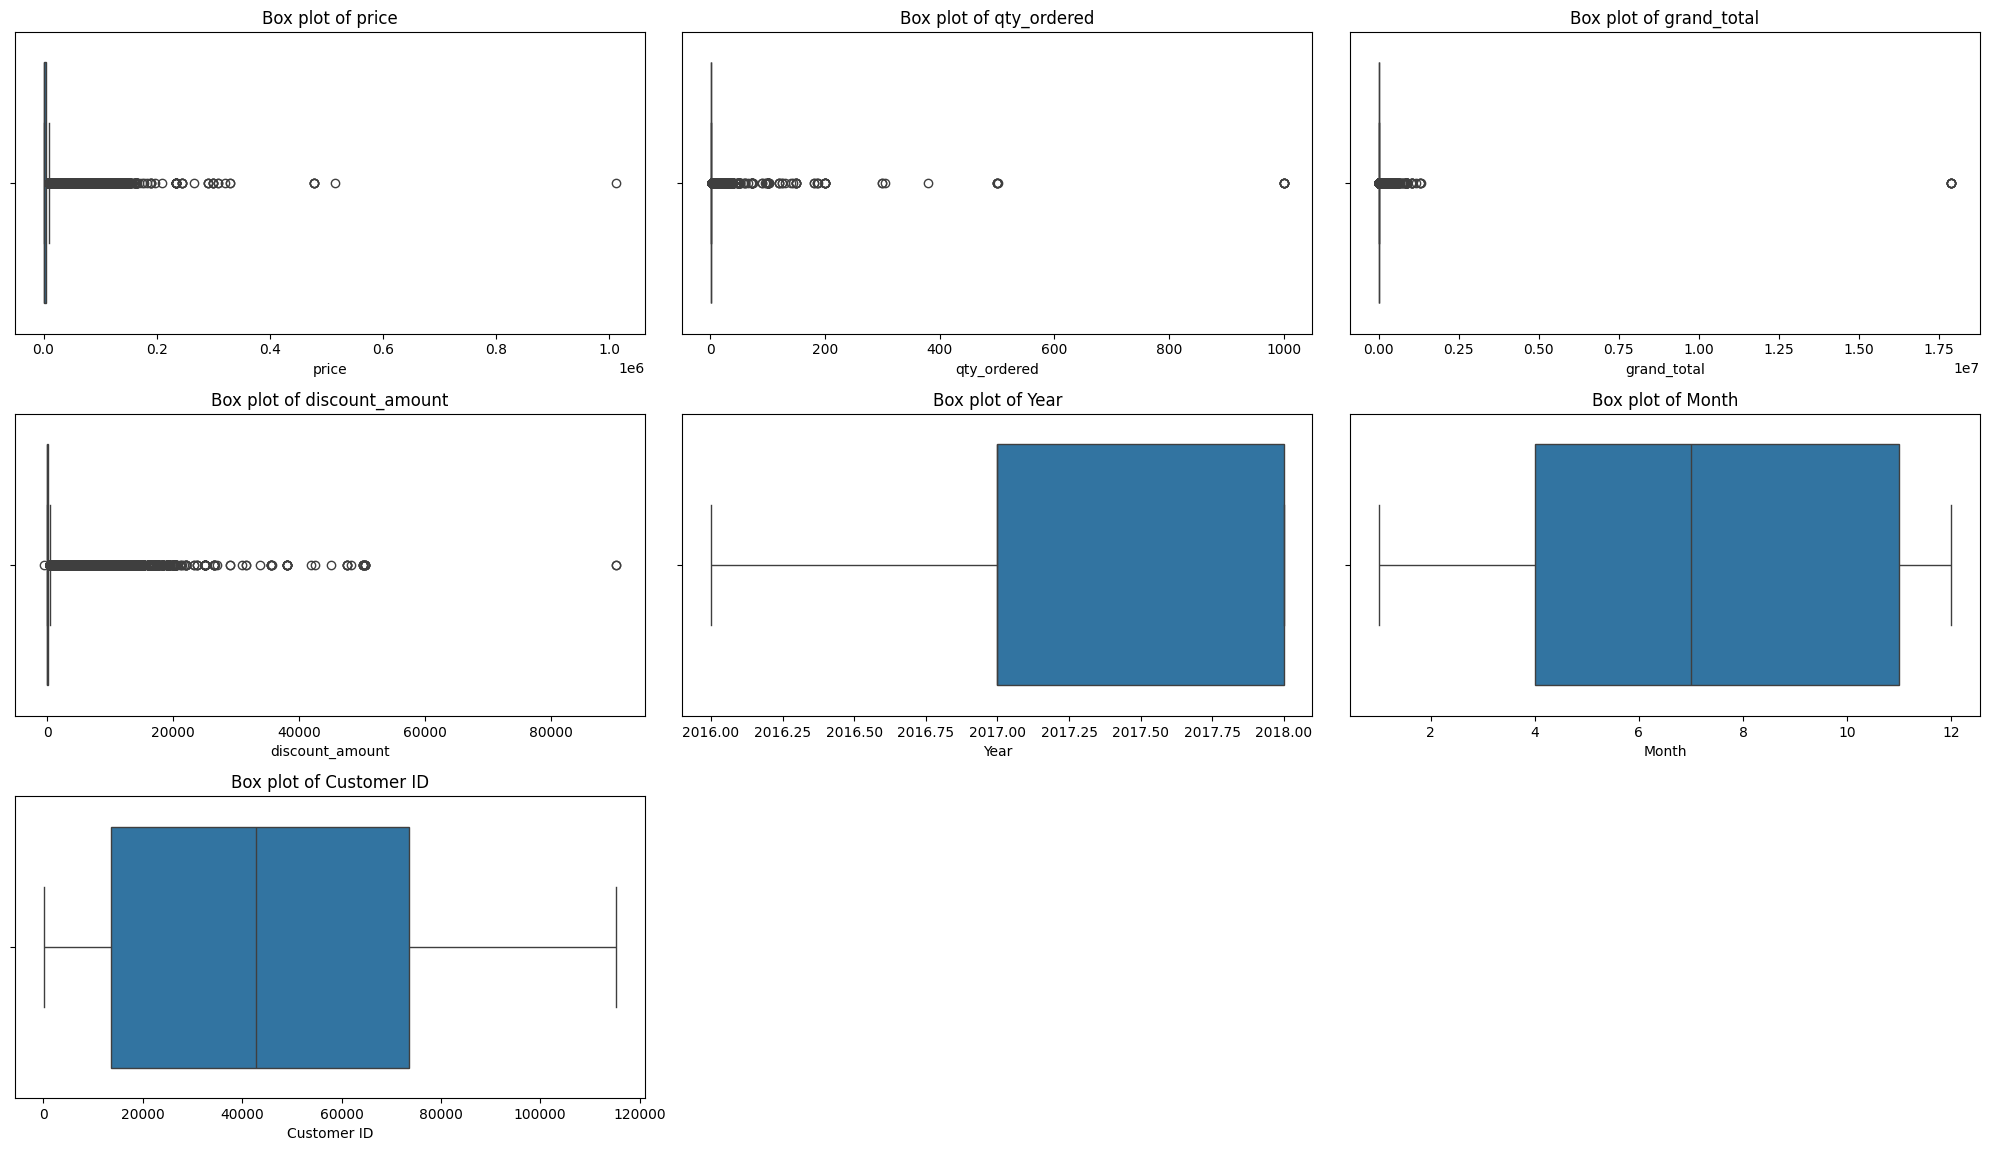

In [14]:
# Box plots to identify outliers
def plot_boxplots(data):
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    plt.figure(figsize=(20, 15))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=data[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

# Plotting box plots for outliers
plot_boxplots(data)

In [15]:
# Function to calculate the number of outliers in each column and return as DataFrame
def count_outliers_df(data):
    outlier_counts = {'Column': [], 'Outlier Count': []}
    
    for col in data.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outlier_counts['Column'].append(col)
        outlier_counts['Outlier Count'].append(len(outliers))
        
    return pd.DataFrame(outlier_counts)

# Calculate the number of outliers for each numerical column and convert to DataFrame
outlier_counts_df = count_outliers_df(data)

# Show the DataFrame
outlier_counts_df

,Column,Outlier Count
0,price,105687
1,qty_ordered,79310
2,grand_total,77090
3,discount_amount,108986
4,Year,0
5,Month,0
6,Customer ID,0


- Insights

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Box Plots      | The box plots reveal that the distribution of data in these columns is heavily skewed, with most of the data concentrated in a narrow range and a few extreme values stretching the scale.    |
|       | Price and grand_total show a few data points that are significantly higher than the rest, indicating potential anomalies or special cases.     |
|       | Qty_ordered shows that while most orders involve a small number of items, there are a few orders with a very high quantity, which could either be bulk orders or data errors.   |
|     | Discount_amount shows many transactions with small discounts, but some have extremely high discounts, which could be promotional campaigns or data entry issues.     |
| Outliers in the Data     | Price, qty_ordered, grand_total, and discount_amount:    |
|       | These columns have significant numbers of outliers, as shown in both the box plots and the outlier count table.     |
|       | Price has over 100,000 outliers, indicating a wide range of values with some very high prices that could be anomalies or special cases (e.g., bulk purchases, high-value items).   |
|     | Qty_ordered and grand_total also show substantial outliers, which may suggest unusually large orders or errors in data entry.     |
|     | Discount_amount has the highest number of outliers, which could indicate extreme discounts applied to certain transactions.    |
| Normal Data Columns     | Year, Month, Customer ID:    |
|       | These columns do not have any outliers, indicating that the data for these fields is consistent and within expected ranges. The distribution for Year and Month looks normal, with no significant deviations.     |
| Keeping Outliers     | Representation of Real Business Scenarios.    |
|       | Identifying Niche Markets.     |
|       | Comprehensive Analysis.     |
|       | Understanding the Extremes.     |
|       | Strategic Decision-Making.     |
|       | Trend Analysis.     |
|       | Avoiding Data Loss.    |

- Columns Name Change

In [16]:
# Dictionary of old column names and new column names
new_column_names = {
    'item_id': 'Item_ID',
    'created_at': 'Order_Creation_Date',
    'sku': 'Product_SKU',
    'price': 'Price',
    'qty_ordered': 'Quantity_Ordered',
    'grand_total': 'Order_Total',
    'category_name_1': 'Product_Category',
    'discount_amount': 'Discount_Amount',
    'payment_method': 'Payment_Method',
    ' MV ': 'Market_Value',
    'Year': 'Year',
    'Month': 'Month',
    'Customer Since': 'Customer_Since_Date',
    'Customer ID': 'Customer_ID'
}

# Rename the columns
data.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame columns
data.columns

Index(['status', 'Order_Creation_Date', 'Product_SKU', 'Price',
       'Quantity_Ordered', 'Order_Total', 'Product_Category',
       'Discount_Amount', 'Payment_Method', 'Market_Value', 'Year', 'Month',
       'Customer_Since_Date', 'Customer_ID'],
      dtype='object')

In [17]:
data.sample(10)

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID
item_id,,,,,,,,,,,,,,
359284,complete,2016-11-29,Edukaan_201224,200.0,1,1370.0,Kids & Baby,0.00,cod,200,2016,11,2016-11-01,21086
217566,complete,2016-07-23,kcc_jazzy,99.0,1,99.0,Beauty & Grooming,0.00,cod,99,2016,7,2016-07-01,820
523025,received,2017-06-22,Nimcos_Shakar-Paray-400gm,196.0,1,366.0,Soghaat,94.23,cod,196,2017,6,2016-11-01,23133
685964,canceled,2017-11-24,WOFGUL59ACD09029A13,1893.0,1,8556.1,Women's Fashion,283.95,Easypay,"1,893",2017,11,2017-11-01,78143
559708,complete,2017-08-13,jj_JLAWN-S-17-132-Pink-Dribble,2464.0,1,3304.0,Women's Fashion,0.00,Payaxis,"2,464",2017,8,2017-06-01,51362
643922,complete,2017-11-19,BAGDET5A005AB125705,35.0,2,3237.6,Beauty & Grooming,14.00,Easypay,70,2017,11,2016-11-01,26859
530228,canceled,2017-07-10,Xiaomi_MI-C6-Gold-64,25900.0,1,27200.0,Mobiles & Tablets,0.00,cod,"25,900",2017,7,2016-07-01,33
383897,canceled,2017-01-08,NYX_ Soft Matte Lip Cream Istanbul,999.0,3,6643.0,Beauty & Grooming,0.00,Payaxis,"2,997",2017,1,2017-01-01,30686
385678,canceled,2017-01-10,cr_MUZAFTI IRANI (500GM),185.0,1,185.0,Soghaat,0.00,Payaxis,185,2017,1,2016-12-01,28952


- Rationale from columns name change:
    - Improved Clarity.
    - Consistency.
    - Ease of Use in Analysis.
    - Minimizing Errors.

- Number of Discounts In The Dataset

In [18]:
# Count the number of orders that received a discount
discounted_orders_count = data[data['Discount_Amount'] > 0].shape[0]

discounted_orders_count

208215

In [19]:
# Calculate the total number of orders
total_orders = data.shape[0]

# Calculate the ratio of discounted orders to total orders
discount_ratio = discounted_orders_count / total_orders

discount_ratio

0.3562129185456885

- Insight:
    - Out of the total number of orders, approximately 35.62% received a discount. This suggests that a significant portion of the orders in the Pakistan E-commerce market involved some form of discount, which could be an important factor influencing customer purchasing behavior and retention.

2. Data Analysis

In [20]:
# Filter discounted and non-discounted orders
discounted_orders = data[data['Discount_Amount'] > 0]
non_discounted_orders = data[data['Discount_Amount'] == 0]

In [21]:
discounted_orders

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID
item_id,,,,,,,,,,,,,,
211135,complete,2016-07-01,kcc_krone deal,360.0,1,60.00,Beauty & Grooming,300.00,cod,360,2016,7,2016-07-01,4
211138,complete,2016-07-01,kcc_krone deal,360.0,1,60.00,Beauty & Grooming,300.00,cod,360,2016,7,2016-07-01,7
211170,refund,2016-07-01,Veet_4,165.0,1,300.00,Beauty & Grooming,82.50,cod,165,2016,7,2016-07-01,21
211171,refund,2016-07-01,RS_Gulab jaman Tin,435.0,1,300.00,Soghaat,217.50,cod,435,2016,7,2016-07-01,21
211175,complete,2016-07-01,cr_PEANUT SALTY-200 GM,90.0,1,740.00,Soghaat,19.15,cod,90,2016,7,2016-07-01,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905091,order_refunded,2018-08-27,MATBIZ5A702C575969E,145.0,1,326.01,Mobiles & Tablets,299.99,cod,145,2018,8,2017-11-01,69407
905092,order_refunded,2018-08-27,MEFEZI5B7169B92D153,275.0,1,326.01,Men's Fashion,299.99,cod,275,2018,8,2017-11-01,69407
905093,order_refunded,2018-08-27,HASQAR5A618CC063535,189.0,1,326.01,Health & Sports,299.99,cod,189,2018,8,2017-11-01,69407


In [22]:
non_discounted_orders

,status,Order_Creation_Date,Product_SKU,Price,Quantity_Ordered,Order_Total,Product_Category,Discount_Amount,Payment_Method,Market_Value,Year,Month,Customer_Since_Date,Customer_ID
item_id,,,,,,,,,,,,,,
211131,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,Women's Fashion,0.0,cod,"1,950",2016,7,2016-07-01,1
211133,canceled,2016-07-01,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1,240.0,Beauty & Grooming,0.0,cod,240,2016,7,2016-07-01,2
211134,canceled,2016-07-01,Ego_UP0017-999-MR0,2450.0,1,2450.0,Women's Fashion,0.0,cod,"2,450",2016,7,2016-07-01,3
211136,order_refunded,2016-07-01,BK7010400AG,555.0,2,1110.0,Soghaat,0.0,cod,"1,110",2016,7,2016-07-01,5
211137,canceled,2016-07-01,UK_Namkino All In One 200 Gms,80.0,1,80.0,Soghaat,0.0,cod,80,2016,7,2016-07-01,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905204,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1,849.0,Women's Fashion,0.0,cod,699,2018,8,2018-08-01,115320
905205,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1,35899.0,Mobiles & Tablets,0.0,bankalfalah,"35,599",2018,8,2018-08-01,115326
905206,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2,652178.0,Mobiles & Tablets,0.0,bankalfalah,"259,998",2018,8,2018-07-01,113474


### 2.1. MOV
- Given the skewed distribution in the box plots, using the median instead of the average (mean) might be more appropriate, especially for calculating the Average Order Value (AOV).
- Reasons:

| **Reason** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Robustness to Outliers     | The median is less affected by extreme values or outliers. Since the distribution is skewed, the mean could be disproportionately influenced by a few very high or very low values, leading to a potentially misleading representation of the central tendency.    |
|  Better Representation of Central Tendency     | In skewed distributions, the median provides a better sense of the “typical” value, as it represents the middle point of the data, where 50% of the values are below and 50% are above.     |
| Skewed Data Consideration      | In the presence of skewness, the mean tends to be pulled in the direction of the skew, while the median remains a more reliable measure of central tendency.   |

In [23]:
# Calculate Median Order Value (MOV)
mov_discounted = discounted_orders['Order_Total'].median()
mov_non_discounted = non_discounted_orders['Order_Total'].median()

In [24]:
print(f"₹ {mov_discounted:,.2f}")
print(f"₹ {mov_non_discounted:,.2f}")

₹ 3,063.64
₹ 1,590.00


- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Higher Median Order Value with Discounts     | Orders that received a discount have a significantly higher median value (₹3,063.64) compared to those that did not receive a discount (₹1,590.00).    |
|       | This suggests that discounts may be encouraging customers to spend more on their orders. The higher median value indicates that, on average, customers are purchasing more or higher-value items when discounts are applied.     |
| Discounts as a Strategy to Increase Sales     | The fact that the median order value is nearly double for discounted orders could imply that discounts are an effective strategy for increasing the average amount spent by customers. This is a critical insight for determining pricing and promotional strategies.   |
| Customer Behavior     | The result could also suggest that customers are more likely to place larger orders when they perceive they are getting a better deal through discounts. This can be useful for understanding customer purchasing behavior and tailoring marketing campaigns.   |

### 2.2. Revenue Discounted

In [25]:
# Calculate Revenue Contribution
revenue_discounted = discounted_orders['Order_Total'].sum()
revenue_non_discounted = non_discounted_orders['Order_Total'].sum()

In [26]:
print(f"₹ {revenue_discounted:,.2f}")
print(f"₹ {revenue_non_discounted:,.2f}")

₹ 1,951,345,687.64
₹ 3,034,995,052.43


- Insights

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Revenue Distribution     | Non-discounted orders contribute more significantly to the total revenue, amounting to approximately ₹ 3.03 billion, compared to ₹ 1.95 billion from discounted orders.    |
|       | This result suggests that despite the higher median order value observed in discounted orders, the overall revenue is still predominantly driven by non-discounted transactions.     |
| Order Volume Consideration     | The higher total revenue from non-discounted orders could indicate that a larger volume of transactions occurs without discounts, or that higher-value items are frequently purchased without discounts.   |
| Potential Influence of Order Volume     | The higher revenue from non-discounted orders might indicate a larger volume of non-discounted transactions, despite individual discounted orders having higher median values.   |
|      | This could also imply that discounts are applied selectively, perhaps only on certain products or during specific promotions, leading to a lower overall revenue share compared to non-discounted orders.   |
| Strategic Insights     | While discounts are effective in boosting the order value, they may not be sufficient to surpass the revenue generated by non-discounted orders. Therefore, a balanced approach to discounting is essential—one that maximizes order value without significantly impacting overall revenue.   |

- Data Visualization

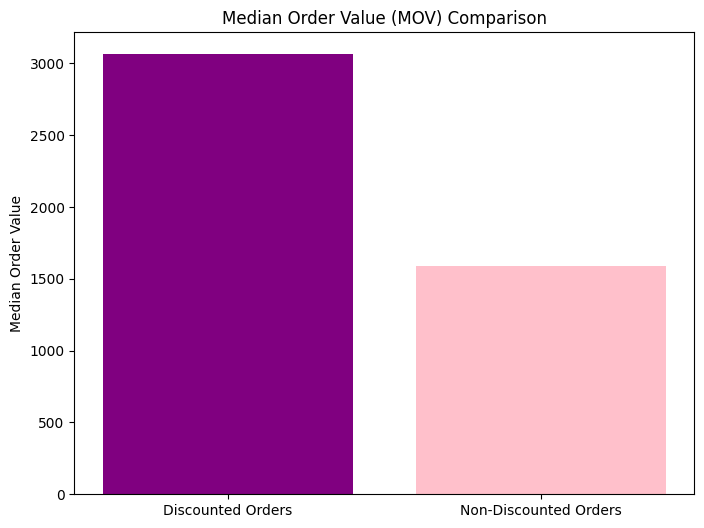

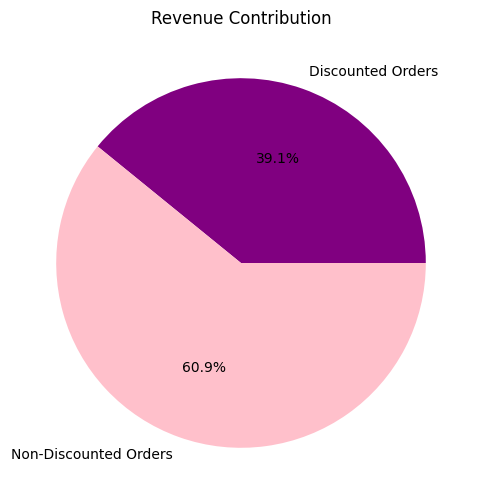

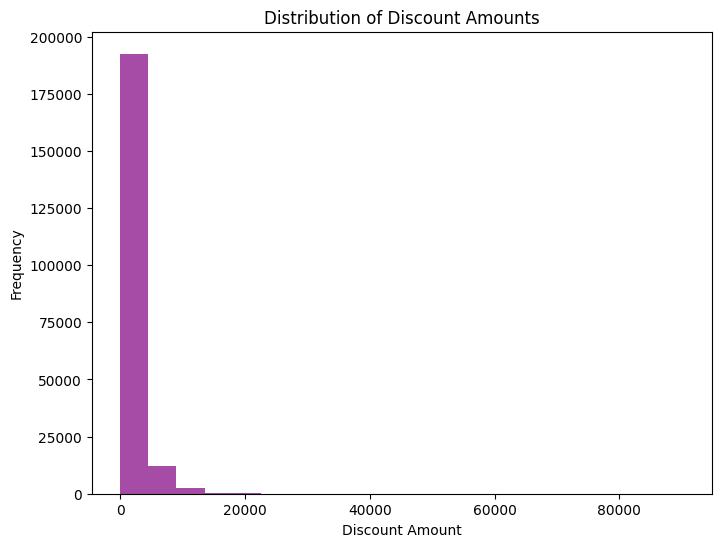

In [27]:
import matplotlib.pyplot as plt

# Bar Chart for MOV
plt.figure(figsize=(8, 6))
plt.bar(['Discounted Orders', 'Non-Discounted Orders'], [mov_discounted, mov_non_discounted], color=['purple', 'pink'])
plt.title('Median Order Value (MOV) Comparison')
plt.ylabel('Median Order Value')
plt.show()

# Pie Chart for Revenue Contribution
plt.figure(figsize=(8, 6))
plt.pie([revenue_discounted, revenue_non_discounted], labels=['Discounted Orders', 'Non-Discounted Orders'], autopct='%1.1f%%', colors=['purple', 'pink'])
plt.title('Revenue Contribution')
plt.show()

# Histogram for Discount Levels
plt.figure(figsize=(8, 6))
plt.hist(discounted_orders['Discount_Amount'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Discount Amounts')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

### 2.3. Discount Distribution

In [28]:
# Round the discount distribution statistics to 2 decimal places
discount_distribution = discounted_orders['Discount_Amount'].describe().round(2)

# Format all statistics except 'count' with the Rupee symbol
discount_distribution['count'] = int(discount_distribution['count'])
discount_distribution.iloc[1:] = discount_distribution.iloc[1:].apply(lambda x: f"₹ {x:,.2f}")

print(discount_distribution)

count       208215.0
mean      ₹ 1,402.23
std       ₹ 2,260.36
min           ₹ 0.08
25%         ₹ 123.00
50%         ₹ 480.00
75%       ₹ 1,995.00
max      ₹ 90,300.00
Name: Discount_Amount, dtype: object


- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Distribution of Discounts     | The majority of discounts are relatively small, with the median discount being ₹ 480.00, which is much lower than the mean of ₹ 1,402.23. This suggests that while most discounts are modest, there are some larger discounts that increase the mean.   |
| Skewness      | The distribution is likely skewed to the right, given the large difference between the mean and the median, along with the high maximum discount of ₹ 90,300.00. This skewness suggests that while most discounts are small, there are outliers with significantly larger discounts.     |
| Strategic Implications    | The higher total revenue from non-discounted orders could indicate that a larger volume of transactions occurs without discounts, or that higher-value items are frequently purchased without discounts.   |
| Potential Influence of Order Volume     | The presence of a few large discounts alongside many smaller ones could imply targeted promotional strategies, where larger discounts are applied selectively to certain high-value products or during special campaigns.   |
|      | Understanding this distribution can help in optimizing discount strategies, potentially focusing on where discounts are most effective in driving sales without heavily impacting overall profitability.   |

### 2.4.  Payment Method Analysis
- This table helps understand how different payment methods are used by customers who receive discounts versus those who do not. It focuses on the number of orders associated with each payment method.
- Analyzes the quantity of orders by payment method and provides insights into customer preferences regarding payment methods based on whether they received a discount or not.

In [29]:
# Payment Method Distribution
payment_method_distribution_discounted = discounted_orders['Payment_Method'].value_counts()
payment_method_distribution_non_discounted = non_discounted_orders['Payment_Method'].value_counts()

In [30]:
# Create a DataFrame to compare payment method distribution between discounted and non-discounted orders
payment_method_distribution = pd.DataFrame({
    'Discounted_Orders': payment_method_distribution_discounted,
    'Non_Discounted_Orders': payment_method_distribution_non_discounted
})

# Fill NaN values with 0 to handle any missing payment methods in either category
payment_method_distribution.fillna(0, inplace=True)

# Calculate the total for each category
total_discounted = payment_method_distribution['Discounted_Orders'].sum()
total_non_discounted = payment_method_distribution['Non_Discounted_Orders'].sum()

# Add percentage columns
payment_method_distribution['Discounted_Orders_Percentage'] = (payment_method_distribution['Discounted_Orders'] / total_discounted) * 100
payment_method_distribution['Non_Discounted_Orders_Percentage'] = (payment_method_distribution['Non_Discounted_Orders'] / total_non_discounted) * 100

# Format the percentage columns as strings with a percentage sign
payment_method_distribution['Discounted_Orders_Percentage'] = payment_method_distribution['Discounted_Orders_Percentage'].map('{:.2f}%'.format)
payment_method_distribution['Non_Discounted_Orders_Percentage'] = payment_method_distribution['Non_Discounted_Orders_Percentage'].map('{:.2f}%'.format)

# Display the DataFrame
payment_method_distribution

,Discounted_Orders,Non_Discounted_Orders,Discounted_Orders_Percentage,Non_Discounted_Orders_Percentage
Payment_Method,,,,
Easypay,44606.0,38294,21.42%,10.18%
Easypay_MA,8376.0,5652,4.02%,1.50%
Payaxis,60280.0,37358,28.95%,9.93%
apg,608.0,1150,0.29%,0.31%
bankalfalah,6736.0,16329,3.24%,4.34%
cashatdoorstep,1.0,731,0.00%,0.19%
cod,23792.0,248168,11.43%,65.95%
customercredit,987.0,6568,0.47%,1.75%
easypay_voucher,25496.0,5680,12.25%,1.51%


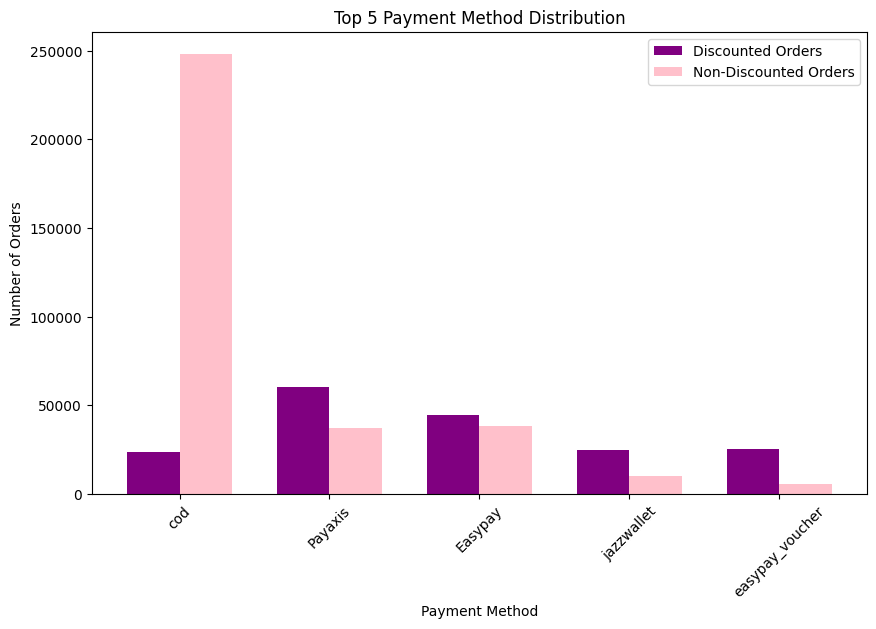

In [31]:

# Select the top 5 payment methods by total orders (Discounted + Non-Discounted)
payment_method_distribution['Total_Orders'] = payment_method_distribution['Discounted_Orders'] + payment_method_distribution['Non_Discounted_Orders']
payment_method_distribution_top5 = payment_method_distribution.sort_values(by='Total_Orders', ascending=False).head(5)

# Plotting Payment Method Distribution (Top 5) - Side by Side Bar Chart
bar_width = 0.35
index = np.arange(len(payment_method_distribution_top5))

plt.figure(figsize=(10, 6))
plt.bar(index, payment_method_distribution_top5['Discounted_Orders'], bar_width, color='purple', label='Discounted Orders')
plt.bar(index + bar_width, payment_method_distribution_top5['Non_Discounted_Orders'], bar_width, color='pink', label='Non-Discounted Orders')

plt.title('Top 5 Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(index + bar_width / 2, payment_method_distribution_top5.index, rotation=45)
plt.legend()

plt.show()

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Dominance of COD (Cash on Delivery) for Non-Discounted Orders     | The cod (Cash on Delivery) payment method is overwhelmingly dominant among non-discounted orders, accounting for 65.95% of them. This suggests that a significant portion of customers who do not receive discounts prefer to pay via COD.   |
|     | In contrast, COD accounts for only 11.43% of discounted orders. This indicates that customers who receive discounts might be more likely to use other payment methods.     |
| Popularity of Easypay, Easypay_Voucher, and Payaxis for Discounted Orders    | Payaxis leads with 28.95% of discounted orders, followed by Easypay at 21.42%, and easypay_voucher at 12.25%. These methods are much more popular among customers who receive discounts.  |
|     | In non-discounted orders, these payment methods account for a much smaller percentage, highlighting that these payment methods may be specifically incentivized or preferred in transactions where discounts are applied.   |
|  Variation in Payment Method Preferences    | There is a noticeable difference in payment method preferences between discounted and non-discounted orders. For instance, while Easypay and Payaxis are popular among discounted orders, they are much less so among non-discounted orders.   |
|     | This variation suggests that certain payment methods might be tied to discount offers or promotional activities, influencing customer choice.   |
|  Low Utilization of Some Payment Methods    | Some payment methods like cashatdoorstep, internetbanking, jazzvoucher, and mygateway have minimal usage in both discounted and non-discounted orders. These methods might not be widely adopted by customers or may not be prominently featured in promotional activities.   |

- Strategic Implications:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Promotional Strategy    | The significant difference in payment method preferences between discounted and non-discounted orders suggests that promotional activities might be influencing payment method choice. This could indicate that customers are being incentivized to use certain payment methods through discounts.   |
| Targeting Based on Payment Method    | The company could consider targeting specific payment methods with further discounts or offers, particularly those already popular among discounted orders like Easypay and Payaxis, to further drive sales.     |
| Reevaluating Payment Method Offerings    | For payment methods with very low usage, it might be worth investigating whether these methods should continue to be offered or if they require more promotion to increase adoption.  |

### 2.5. MOV by Payment Method

- This table helps understand how different payment methods influence the value of orders when discounts are applied. It focuses on the value of orders (MOV) associated with each payment method.
- Analyzes the value of orders by payment method and provides insights into how different payment methods affect the monetary value of orders, particularly when discounts are applied.

In [32]:
# Calculate MOV by Payment Method
mov_by_payment_discounted = discounted_orders.groupby('Payment_Method')['Order_Total'].median()
mov_by_payment_non_discounted = non_discounted_orders.groupby('Payment_Method')['Order_Total'].median()

In [33]:
# Create a DataFrame to compare MOV by payment method between discounted and non-discounted orders
mov_by_payment = pd.DataFrame({
    'Discounted_Orders_MOV': mov_by_payment_discounted,
    'Non_Discounted_Orders_MOV': mov_by_payment_non_discounted
})

# Fill NaN values with 0 to handle any missing payment methods in either category
mov_by_payment.fillna(0, inplace=True)

# Format the MOV columns with Rupee symbol
mov_by_payment['Discounted_Orders_MOV'] = mov_by_payment['Discounted_Orders_MOV'].apply(lambda x: f"₹ {x:,.2f}")
mov_by_payment['Non_Discounted_Orders_MOV'] = mov_by_payment['Non_Discounted_Orders_MOV'].apply(lambda x: f"₹ {x:,.2f}")

# Calculate the total MOV for each category (without formatting for accurate calculation)
total_mov_discounted = mov_by_payment_discounted.sum()
total_mov_non_discounted = mov_by_payment_non_discounted.sum()

# Add percentage columns
mov_by_payment['Discounted_Orders_Percentage'] = (mov_by_payment_discounted / total_mov_discounted) * 100
mov_by_payment['Non_Discounted_Orders_Percentage'] = (mov_by_payment_non_discounted / total_mov_non_discounted) * 100

# Format the percentage columns as strings with a percentage sign
mov_by_payment['Discounted_Orders_Percentage'] = mov_by_payment['Discounted_Orders_Percentage'].map('{:.2f}%'.format)
mov_by_payment['Non_Discounted_Orders_Percentage'] = mov_by_payment['Non_Discounted_Orders_Percentage'].map('{:.2f}%'.format)

# Display the DataFrame
mov_by_payment

,Discounted_Orders_MOV,Non_Discounted_Orders_MOV,Discounted_Orders_Percentage,Non_Discounted_Orders_Percentage
Payment_Method,,,,
Easypay,"₹ 4,229.60","₹ 3,520.00",8.61%,2.46%
Easypay_MA,"₹ 3,518.10","₹ 2,061.00",7.16%,1.44%
Payaxis,"₹ 3,008.00","₹ 6,319.00",6.13%,4.41%
apg,"₹ 5,849.48","₹ 1,825.00",11.91%,1.27%
bankalfalah,"₹ 4,483.00","₹ 7,800.00",9.13%,5.44%
cashatdoorstep,₹ 210.00,₹ 950.00,0.43%,0.66%
cod,₹ 999.00,"₹ 1,260.00",2.03%,0.88%
customercredit,₹ 0.00,₹ 0.00,0.00%,0.00%
easypay_voucher,"₹ 11,970.00","₹ 4,000.00",24.37%,2.79%


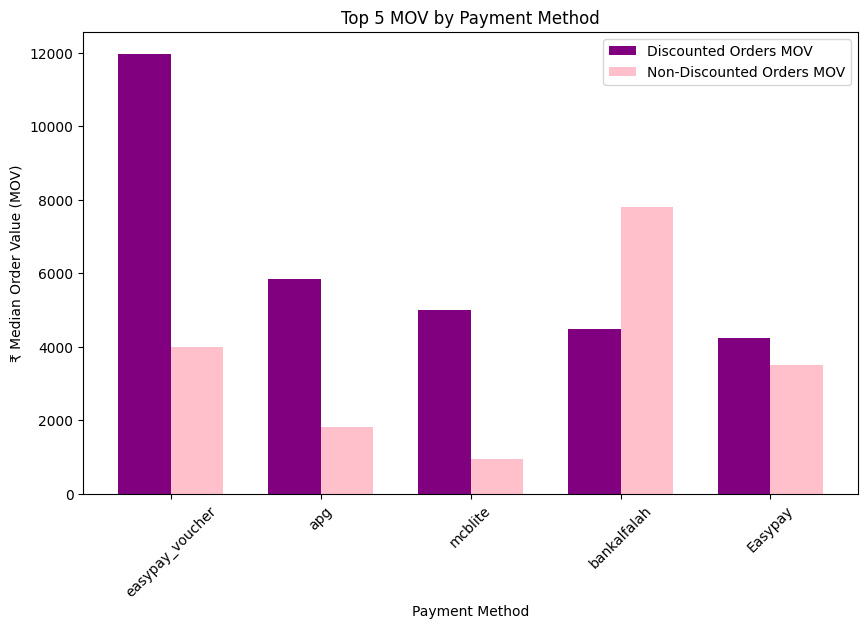

In [34]:
# Convert MOV columns back to numerical values for sorting
mov_by_payment['Discounted_Orders_MOV'] = mov_by_payment['Discounted_Orders_MOV'].apply(lambda x: float(x.replace('₹', '').replace(',', '')))
mov_by_payment['Non_Discounted_Orders_MOV'] = mov_by_payment['Non_Discounted_Orders_MOV'].apply(lambda x: float(x.replace('₹', '').replace(',', '')))

# Select the top 5 payment methods by discounted orders MOV
mov_by_payment_top5 = mov_by_payment.sort_values(by='Discounted_Orders_MOV', ascending=False).head(5)

# Plotting MOV by Payment (Top 5) - Side by Side Bar Chart
bar_width = 0.35
index = np.arange(len(mov_by_payment_top5))

plt.figure(figsize=(10, 6))
plt.bar(index, mov_by_payment_top5['Discounted_Orders_MOV'], bar_width, color='purple', label='Discounted Orders MOV')
plt.bar(index + bar_width, mov_by_payment_top5['Non_Discounted_Orders_MOV'], bar_width, color='pink', label='Non-Discounted Orders MOV')

plt.title('Top 5 MOV by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('₹ Median Order Value (MOV)')
plt.xticks(index + bar_width / 2, mov_by_payment_top5.index, rotation=45)
plt.legend()

plt.show()

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| Significant Contribution of Easypay_Voucher in Discounted Orders     | Easypay_Voucher stands out with a Median Order Value (MOV) of ₹ 11,970.00 for discounted orders, contributing 24.37% of the total MOV in this category. This indicates that when discounts are applied, customers using Easypay_Voucher tend to have significantly higher order values.   |
|     | In non-discounted orders, the MOV for Easypay_Voucher is much lower at ₹ 4,000.00, contributing only 2.79% to the total MOV in that category.     |
| High MOV in Financesettlement for Non-Discounted Orders    | The Financesettlement payment method shows an exceptionally high MOV of ₹ 85,491.00 in non-discounted orders, contributing a significant 59.68% to the total MOV in that category. This suggests that this payment method is associated with very high-value transactions when discounts are not applied.  |
|     | Notably, this payment method has no contribution to discounted orders, indicating that it might not be eligible for or commonly used in discounted transactions.   |
|  Low Contribution of COD (Cash on Delivery) in Discounted Orders    | The MOV for COD in discounted orders is relatively low at ₹ 999.00, contributing only 2.03% to the total MOV. This is lower compared to its contribution in non-discounted orders, where the MOV is ₹ 1,260.00, contributing 0.88%. This suggests that customers using COD tend to have smaller order values when discounts are applied.   |

2.5.1. Comparison Between Payment Method Distribution And MOV by Payment

- Insights:

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------|
| High Usage vs. High Value     | In the Payment Method Distribution analysis, methods like cod (Cash on Delivery) dominate the non-discounted orders, suggesting it’s the most frequently used payment method without discounts.   |
|      | However, in the MOV by Payment analysis, cod shows relatively lower median order values, indicating that while frequently used, the orders associated with this payment method are generally of lower value.   |
| Specialized Payment Methods     | The Payment Method Distribution highlights that methods like Easypay_Voucher and Payaxis are popular for discounted orders, representing a substantial proportion of these transactions.   |
|      | The MOV by Payment analysis reinforces this by showing high median order values for Easypay_Voucher in discounted transactions, indicating that these methods are not only popular but also associated with higher-value purchases.   |
| Anomalies in Payment Methods     | Payment Method Distribution shows financesettlement has no usage in discounted orders, yet dominates non-discounted orders by volume.   |
|      | MOV by Payment reveals that financesettlement is associated with exceptionally high median order values in non-discounted orders, confirming its role in high-value transactions.  |

### 2.6. Statistical Tests

2.6.1. T-Test for Average Order Value (AOV) Comparison
- Perform a t-test to statistically compare the AOV between discounted and non-discounted orders.

In [37]:
# T-test for AOV comparison
t_stat, p_value = ttest_ind(discounted_orders['Order_Total'], non_discounted_orders['Order_Total'])

t_stat, p_value

(7.801283313597773, 6.1381081725830495e-15)

- Interpretation:

| **Interpretation**                                        |
|:-------------------------------------------------------------:|
| The T-test compares the mean order value between discounted and non-discounted orders.   |
| A T-statistic of 7.80 indicates a significant difference between the means of the two groups.   |
| The P-value is extremely small, much less than 0.05, indicating that this difference is statistically significant.   |
| Conclusion:   |
| There is a statistically significant difference in the average order value between discounted and non-discounted orders, suggesting that discounts do indeed impact how much customers spend on their orders.   |

2.6.2. Chi-Square Test for Payment Method Distribution
- Conduct a chi-square test to determine if there’s a significant difference in payment method distribution between discounted and non-discounted orders.

In [40]:
# Chi-square test for payment method distribution
contingency_table = pd.crosstab(data['Payment_Method'], data['Discount_Amount'] > 0)
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p

(195419.80167831318, 0.0)

- Interpretation:

| **Interpretation**                                        |
|:-------------------------------------------------------------:|
| The Chi-Square test examines the relationship between payment methods and whether an order received a discount.   |
| A Chi-Square statistic of 195,419.80 is very large, and the P-value of 0.0 indicates a highly significant result.   |
| Conclusion:   |
| There is a statistically significant association between payment method and whether an order received a discount. This suggests that certain payment methods are more likely to be associated with discounted orders, or that the choice of payment method may influence the likelihood of receiving a discount.   |

2.6.3. Summary

| **Insight** | **Interpretation**                                        |
|:---------------:|:-------------------------------------------------------------:|
| Impact of Discounts on Spending     | The T-test confirms that discounts significantly influence customer spending, with a clear difference in average order values between discounted and non-discounted orders.   |
| Payment Method Influence     | The Chi-Square test shows a strong relationship between the payment method used and whether the order was discounted. This suggests that certain payment methods might be targeted or preferred during promotional activities involving discounts.   |

### 2.7. Heat Map Correlation

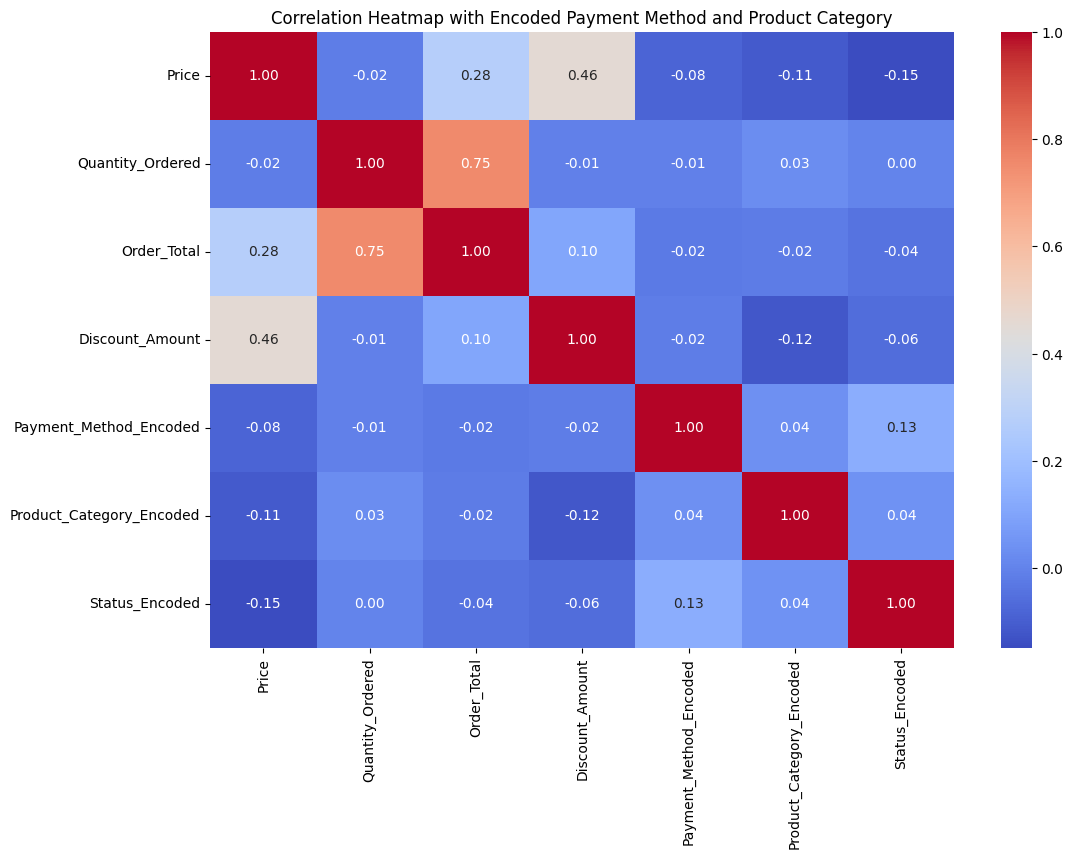

In [42]:
# Encode 'Payment_Method' and 'Product_Category' using LabelEncoder
label_encoder = LabelEncoder()
data['Payment_Method_Encoded'] = label_encoder.fit_transform(data['Payment_Method'])
data['Product_Category_Encoded'] = label_encoder.fit_transform(data['Product_Category'])
data['Status_Encoded'] = label_encoder.fit_transform(data['status'])

# Drop the 'Year', 'Month', and 'Customer_ID' columns
data_dropped = data.drop(columns=['Year', 'Month', 'Customer_ID'])

# Selecting numerical columns for the heatmap correlation, including the new encoded columns
numerical_columns = data_dropped.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = data_dropped[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap with Encoded Payment Method and Product Category')
plt.show()

- Insights:

| **Heat Map** | **Insight** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Strong Correlations    | Quantity_Ordered and Order_Total (0.75)      | There is a strong positive correlation between the quantity ordered and the total order value. This is expected, as ordering more items generally leads to a higher total order value.      |
| Moderate Correlations  | Price and Order_Total (0.28)      | There is a moderate positive correlation between the price and the total order value. Higher prices contribute to higher order totals, but the correlation isn’t as strong as with quantity, suggesting that other factors like discounts also play a significant role.      |
|    | Price and Discount_Amount (0.46)      | A moderate positive correlation exists between price and discount amount. This indicates that higher-priced items are more likely to receive higher discounts.     |
| Weak or Negative Correlations    | Product_Category_Encoded and Price (-0.11)      | There is a weak negative correlation between the encoded product category and price. This could suggest that certain categories are generally associated with lower prices, though the correlation is not strong.      |
|    | Payment_Method_Encoded and Order_Total (-0.02)      | The correlation between the payment method and the order total is very weak and slightly negative, suggesting that the choice of payment method does not significantly influence the total order value.     |
|    | Payment_Method_Encoded and Discount_Amount (-0.02)      | This means that the choice of payment method does not significantly influence the discount amount received by the customer.     |

2.7.1. Difference Between Heat Map And Statistical Results
- Relationship Betweeen Payment Method and Discount Amount

| **Discrepancy** | **Analysis** | **Interpretation**                                        |
|:----:|:---------------:|:-------------------------------------------------------------:|
| Chi-Square vs. Correlation    | The Chi-Square test      | Assessing whether there is a relationship between the type of payment method and the likelihood of receiving a discount. It tells us whether certain payment methods are statistically more likely to be associated with discounted or non-discounted orders, which is a categorical association.      |
|   | The correlation analysis      | Looks at how the payment method (now treated as a numerical value through encoding) is related to the actual discount amount. This measures whether using a specific payment method results in a higher or lower discount, which appears to be weak based on the correlation coefficient.      |
| Different Aspects of the Relationship   | The Chi-Square test      | Focused on the occurrence (whether an order is discounted or not)     |
|    |       | Focus: Relationship in terms of the number of discounted orders.     |
|     | The Correlation     | Focused on the magnitude (the actual amount of discount applied). A payment method might be strongly associated with receiving discounts (hence the significant Chi-Square result), but the specific discount amounts might still vary widely and not show a strong pattern (hence the weak correlation).      |
|    |       | Focus: Relationship in terms of the value of the discount.     |

- Summary:
The key takeaway is that while certain payment methods might be more associated with receiving discounts, the actual discount amounts given do not show a strong consistent relationship with the payment method.